Initial shape: (59808, 55)
Columns: ['Message', 'Time', 'Longitude', 'Latitude', 'Technology_Mode', 'NR_UE_PCI_0', 'NR_UE_RSRP_0', 'NR_UE_RSRQ_0', 'NR_UE_SINR_0', 'NR_UE_Nbr_PCI_0', 'NR_UE_Nbr_PCI_1', 'NR_UE_Nbr_PCI_2', 'NR_UE_Nbr_PCI_3', 'NR_UE_Nbr_PCI_4', 'NR_UE_Nbr_RSRP_0', 'NR_UE_Nbr_RSRP_1', 'NR_UE_Nbr_RSRP_2', 'NR_UE_Nbr_RSRP_3', 'NR_UE_Nbr_RSRP_4', 'NR_UE_Nbr_RSRQ_0', 'NR_UE_Nbr_RSRQ_1', 'NR_UE_Nbr_RSRQ_2', 'NR_UE_Nbr_RSRQ_3', 'NR_UE_Nbr_RSRQ_4', 'NR_UE_Timing_Advance', 'NR_UE_Pathloss_DL_0', 'NR_UE_Throughput_PDCP_DL', 'NR_UE_NACK_Rate_DL_0', 'NR_UE_Ack_As_Nack_DL_0', 'NR_UE_MCS_DL_0', 'NR_UE_RB_Num_DL_0', 'NR_UE_Modulation_Avg_DL_0', 'NR_UE_RI_DL_0', 'NR_UE_BLER_DL_0', 'NR_UE_CCE_AggregationLev_0', 'NR_UE_Power_Tx_PUSCH_0', 'NR_UE_Power_Tx_PRACH_0', 'NR_UE_NACK_Rate_UL_0', 'NR_UE_RACH_Attempt', 'NR_UE_RACH_OK', 'NR_UE_RACH_Fail', 'NR_UE_RACH_Procedure_Count', 'NR_UE_RRCReEstAttempt', 'NR_UE_RRCReEstFail', 'NR_UE_RRCReEst_EndResult', 'NR_UE_RRCConnectionAttempt', 'NR_UE_RRCConn

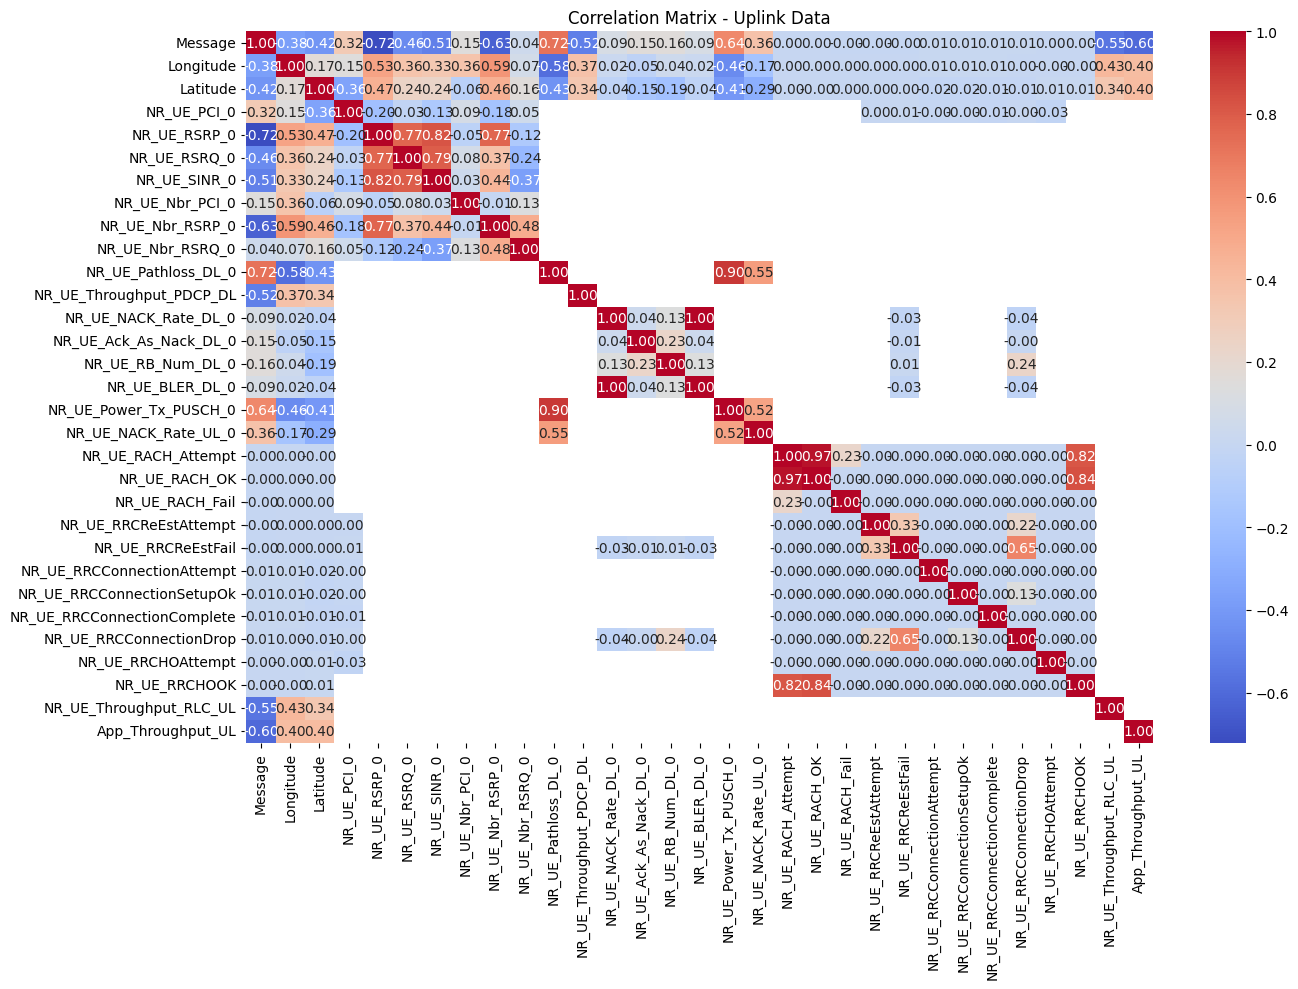

In [2]:
import pandas as pd

# Step 1: Load the Series Formatted Data sheet
file_path = "../data/raw/5G_UL.xlsx"
df = pd.read_excel(file_path, sheet_name="Series Formatted Data")

# Step 2: Drop completely empty rows and columns
df.dropna(axis=0, how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Step 3: Clean up column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace(".", "", regex=False)

# Step 4: Check shape and column names
print("Initial shape:", df.shape)
print("Columns:", df.columns.tolist())

# Step 5: Drop rows where Latitude/Longitude are missing (if present)
if 'Longitude' in df.columns and 'Latitude' in df.columns:
    df.dropna(subset=['Longitude', 'Latitude'], inplace=True)

# Step 6: Drop columns with 100% missing values
df = df.dropna(axis=1, how='all')

# Step 7: Drop columns with very low data (e.g., < 1% non-null)
threshold = 0.01 * len(df)
df = df.dropna(axis=1, thresh=threshold)

# Step 8: Basic summary
print("\n✅ Cleaned shape:", df.shape)
print("\n📊 Remaining columns:", df.columns.tolist())
print("\n📈 Statistical summary:\n", df.describe())

# Optional: Visual correlation matrix if it makes sense
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - Uplink Data")
plt.tight_layout()
plt.show()
